In [2]:
include("src/Sim.jl")

Main.Sim

In [3]:
using DifferentialEquations
using Plots
using .Sim

In [ ]:
using Pkg
Pkg.add(url="https://github.com/JuliaMBD/JuliaMBDv1.git")

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("DifferentialEquations")

In [ ]:
using JuliaMBDv1
using DifferentialEquations
using Plots

In [4]:
#出来ている

In [5]:
#pitch_rate

In [6]:
#ConstantBlockの初期値が指定されていなかったので自分で勝手に定めた
#initialcondition = 6と勝手に指定,掛け算割り算は直接演算
#OutBlockを一つ増やした

@model pitch_rate begin
    @parameter I_center2Fr_ENG_mount I_center2Rr_ENG_mount I_center2Fr_Chair I_center2Rr_Chair I_center2Rr_sus I_center2Fr_sus i_center_gravity
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk In4 = InBlock()
    @blk In5 = InBlock()
    @blk In6 = InBlock()
    @blk Constant4 = ConstantBlock(I_center2Fr_ENG_mount)
    @blk Constant1 = ConstantBlock(I_center2Rr_ENG_mount)
    @blk Constant5 = ConstantBlock(I_center2Fr_Chair)
    @blk Constant7 = ConstantBlock(I_center2Rr_Chair)
    @blk Constant3 = ConstantBlock(I_center2Rr_sus)
    @blk Constant2 = ConstantBlock(I_center2Fr_sus)
    @blk Add1 = AddBlock([:-, :-, :-, :-, :+, :+]) inport[1]:pro1 inport[2]:pro2 inport[3]:pro3 inport[4]:pro4 inport[5]:pro5 inport[6]:pro6
    @blk Constant6 = ConstantBlock(i_center_gravity)
    @blk Integrator = IntegratorBlock(initialcondition = 6)
    @blk Out = OutBlock()
    @blk Out2 = OutBlock()
    
    
    @connect In1 * Constant4 => pro1
    @connect In2 * Constant1 => pro2
    @connect In3 * Constant5 => pro3
    @connect In4 * Constant7 => pro4
    @connect In5 * Constant3 => pro5
    @connect In6 * Constant2 => pro6
    @connect Add1 / Constant6 => Integrator
    @connect Integrator => Out
    @connect Integrator => Out2
end

pitch_rate (generic function with 1 method)

In [7]:
@model TestPitch_rate begin
    
    @parameter I_center2Fr_ENG_mount I_center2Rr_ENG_mount I_center2Fr_Chair I_center2Rr_Chair I_center2Rr_sus I_center2Fr_sus i_center_gravity
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk Ramp3 = RampBlock(starttime = 10, slope = 25) outport:inin3
    @blk Ramp4 = RampBlock(starttime = 10, slope = 35) outport:inin4
    @blk Ramp5 = RampBlock(starttime = 10, slope = 85) outport:inin5
    @blk Ramp6 = RampBlock(starttime = 10, slope = 95) outport:inin6
    @blk pitc_r = pitch_rate(I_center2Fr_ENG_mount=I_center2Fr_ENG_mount, I_center2Rr_ENG_mount=I_center2Rr_ENG_mount, I_center2Fr_Chair=I_center2Fr_Chair, I_center2Rr_Chair=I_center2Rr_Chair, I_center2Rr_sus=I_center2Rr_sus, I_center2Fr_sus=I_center2Fr_sus, i_center_gravity=i_center_gravity) inport[1]:a inport[2]:b inport[3]:c inport[4]:d inport[5]:e inport[6]:f outport[1]:omega outport[2]:beta
    @connect inin1 => a
    @connect inin2 => b
    @connect inin3 => c
    @connect inin4 => d
    @connect inin5 => e
    @connect inin6 => f

end

TestPitch_rate (generic function with 1 method)

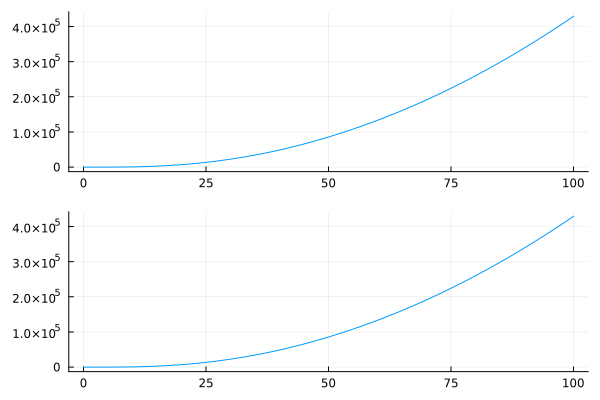

In [8]:
m = TestPitch_rate(I_center2Fr_ENG_mount=2, I_center2Rr_ENG_mount=3, I_center2Fr_Chair=4, I_center2Rr_Chair=5, I_center2Rr_sus=6, I_center2Fr_sus=7, i_center_gravity=8);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [ ]:
#出来ている

In [ ]:
#v_z_carbody

In [ ]:
#ConstantBlockの初期値が指定されていなかったので自分で勝手に定めた
#initialcondition = 6と勝手に指定,掛け算割り算は直接演算
#OutBlockを一つ増やした

@model v_z_carbody begin
    @parameter g M_car_body
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk In4 = InBlock()
    @blk In5 = InBlock()
    @blk In6 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_car_body)
    @blk Add1 = AddBlock([:+, :+, :+, :+, :+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:in3 inport[4]:in4 inport[5]:in5 inport[6]:in6 inport[7]:pro
    @blk Integrator1 = IntegratorBlock(initialcondition = 6)
    @blk Out = OutBlock()
    
    @blk Out2 = OutBlock()
    
    
    @connect In1 => in1
    @connect In2 => in2
    @connect In3 => in3
    @connect In4 => in4
    @connect In5 => in5
    @connect In6 => in6
    @connect Constant1 * Constant => pro
    @connect Add1 / Constant => Integrator1
    @connect Integrator1 => Out
    @connect Integrator1 => Out2
end

In [ ]:
@model TestV_z_carbody begin
    
    @parameter g M_car_body
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk Ramp3 = RampBlock(starttime = 10, slope = 25) outport:inin3
    @blk Ramp4 = RampBlock(starttime = 10, slope = 35) outport:inin4
    @blk Ramp5 = RampBlock(starttime = 10, slope = 85) outport:inin5
    @blk Ramp6 = RampBlock(starttime = 10, slope = 95) outport:i2nin6
    @blk v_z_car = v_z_carbody(g=g, M_car_body=M_car_body) inport[1]:a inport[2]:b inport[3]:c inport[4]:d inport[5]:e inport[6]:f  outport[1]:omega outport[2]:beta
    @connect inin1 => a
    @connect inin2 => b
    @connect inin3 => c
    @connect inin4 => d
    @connect inin5 => e
    @connect inin6 => f

end

In [ ]:
m = TestV_z_carbody(g=9.8, M_car_body=2);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [ ]:
#出来ていない

In [ ]:
#z_velocity

In [ ]:
@model z_velocity begin
    @parameter I_center2Fr_ENGmount I_center2Rr_ENGmount I_center2Fr_Chair I_center2Rr_Chair I_center2Rr_sus I_center2Fr_sus
    
    @blk In1 = InBlock() #v_z_carbody
    @blk In2 = InBlock() #pitch_rate
    @blk Constant10 = ConstantBlock(I_center2Fr_ENGmount)
    @blk Constant1 = ConstantBlock(I_center2Rr_ENGmount)
    @blk Constant9 = ConstantBlock(I_center2Fr_Chair)
    @blk Constant2 = ConstantBlock(I_center2Rr_Chair)
    @blk Constant8 = ConstantBlock(I_center2Rr_sus)
    @blk Constant7 = ConstantBlock(I_center2Fr_sus)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro8
    @blk Add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro1
    @blk Add3 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro7
    @blk Add6 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro2
    @blk Add4 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro6
    @blk Add5 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro5
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    @blk Out3 = OutBlock()
    @blk Out4 = OutBlock()
    @blk Out5 = OutBlock()
    @blk Out6 = OutBlock()
    
    @connect In1 => in1
    @connect In2 * Constant10 => pro8
    @connect In2 * Constant1 => pro1
    @connect In2 * Constant9 => pro7
    @connect In2 * Constant2 => pro2
    @connect In2 * Constant8 => pro6
    @connect In2 * Constant7 => pro5
    @connect Add2 => Out1
    @connect Add1 => Out2
    @connect Add3 => Out3
    @connect Add6 => Out4
    @connect Add4 => Out5
    @connect Add5 => Out6
end
    

In [ ]:
@model TestZ_velocity begin
    
    @parameter I_center2Fr_ENGmount I_center2Rr_ENGmount I_center2Fr_Chair I_center2Rr_Chair I_center2Rr_sus I_center2Fr_sus
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    @blk z_vel = z_velocity(I_center2Fr_ENGmount=I_center2Fr_ENGmount, I_center2Rr_ENGmount=I_center2Rr_ENGmount, I_center2Fr_Chair=I_center2Fr_Chair, I_center2Rr_Chair=I_center2Rr_Chair, I_center2Rr_sus=I_center2Rr_sus, I_center2Fr_sus=I_center2Fr_sus) inport[1]:a inport[2]:b outport[1]:aa outport[2]:bb outport[3]:cc outport[4]:dd outport[5]:ee outport[6]:ff
    @connect inin1 => a
    @connect inin2 => b

end

In [ ]:
m = TestZ_velocity(I_center2Fr_ENGmount=2, I_center2Rr_ENGmount=3, I_center2Fr_Chair=4, I_center2Rr_Chair=5, I_center2Rr_sus=6, I_center2Fr_sus=7);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(aa,bb,cc,dd,ee,ff));
sol.graph